In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, FunctionTransformer,StandardScaler
from collections import Counter


In [67]:
data=pd.read_csv('data class.csv')
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [69]:
data.isna().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [70]:
data.duplicated().sum()

0

In [71]:
category_column=data.select_dtypes(include='object')
unique_values={}
for column in cat_column.columns:
    unique_values[column]=data[column].unique()
unique_values


{'gender': array(['f', 'm'], dtype=object),
 'ethnicity': array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
        'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
        'others'], dtype=object),
 'jaundice': array(['no', 'yes'], dtype=object),
 'austim': array(['no', 'yes'], dtype=object),
 'contry_of_res': array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
        'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
        'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
        'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
        'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
        'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
        'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
        'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
        'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Le

In [72]:
#adjust values on data 
data.replace({"gender":{"f":0,"m":1}},inplace=True)
data.replace({"ethnicity":{"?":"Others","others":"Others"}},inplace=True)
data.replace({"relation":{"?":"Others"}},inplace=True)
data.replace({"jaundice":{"no":0,"yes":1},"austim":{"no":0,"yes":1},"used_app_before":{"no":0,"yes":1}},inplace=True)


In [73]:
data['age']

0      38.172746
1      47.750517
2       7.380373
3      23.561927
4      43.205790
         ...    
795    16.597187
796    20.703001
797     5.711481
798    16.414305
799    46.966113
Name: age, Length: 800, dtype: float64

In [74]:
data['age']=data['age'].astype('int64')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    int64  
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    int64  
 15  austim           800 non-null    int64  
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

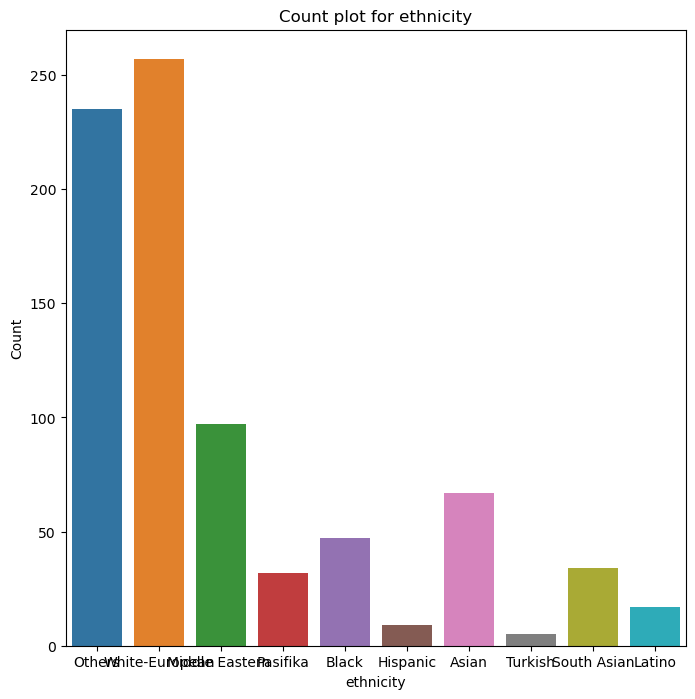

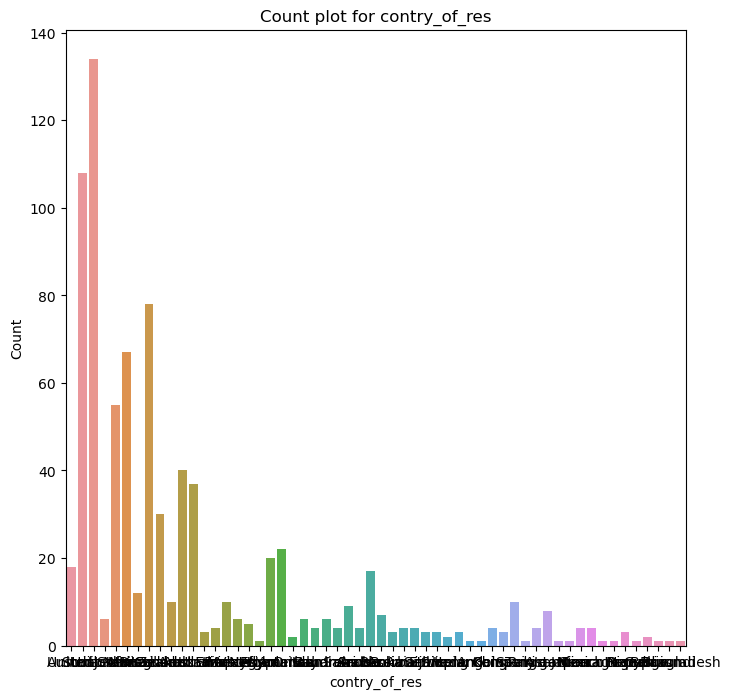

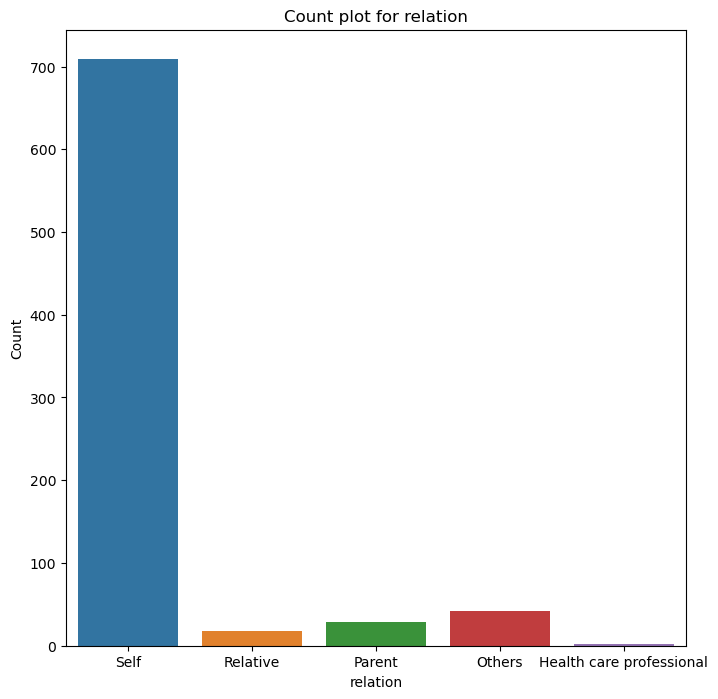

In [76]:
object_columns=data.select_dtypes(include='object').drop(columns='age_desc')
for column in object_columns.columns:  # Use `cat_column` directly if it's a list of column names
    plt.figure(figsize=(8, 8))  # Corrected argument `figsize`
    plt.title(f"Count plot for {column}")  # Fixed typo in variable name `col`
    sns.countplot(x=data[column])  # Ensure `data[column]` is valid
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


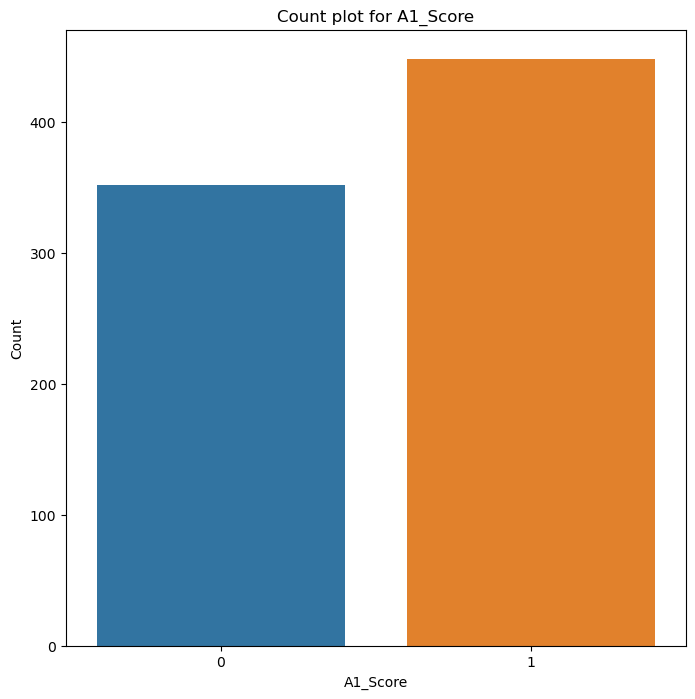

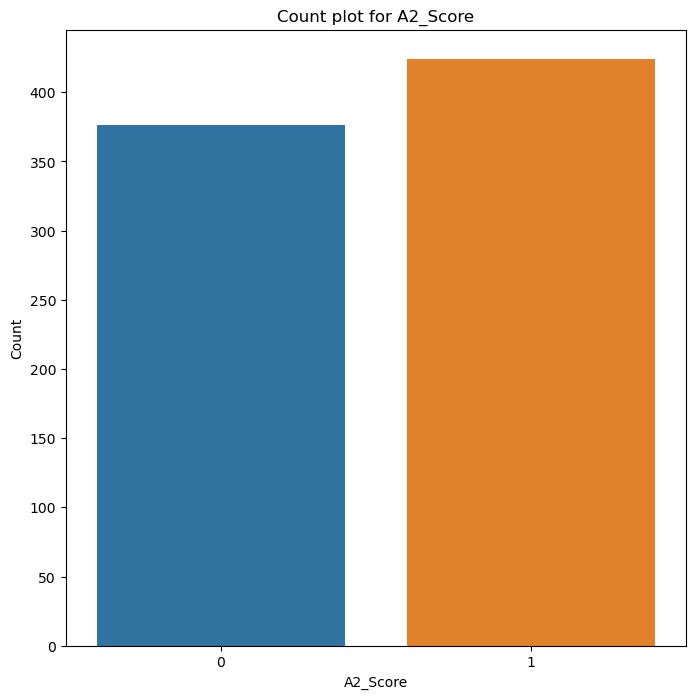

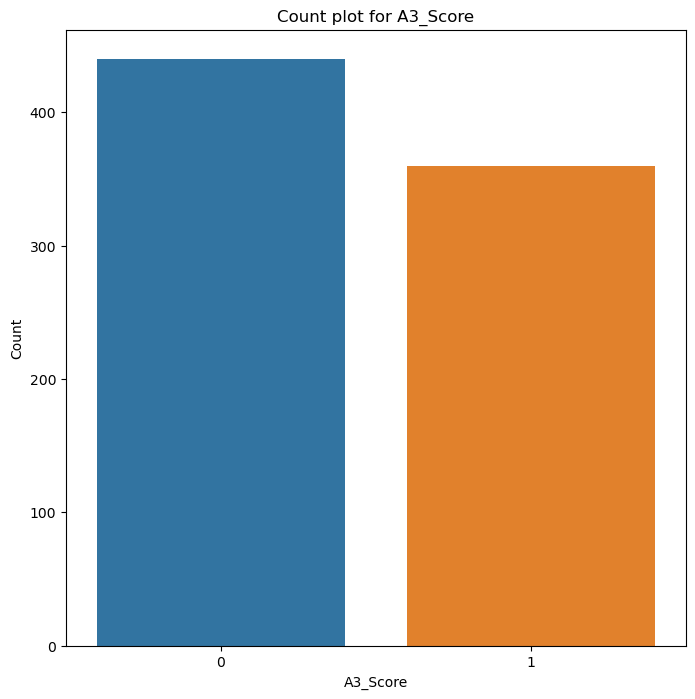

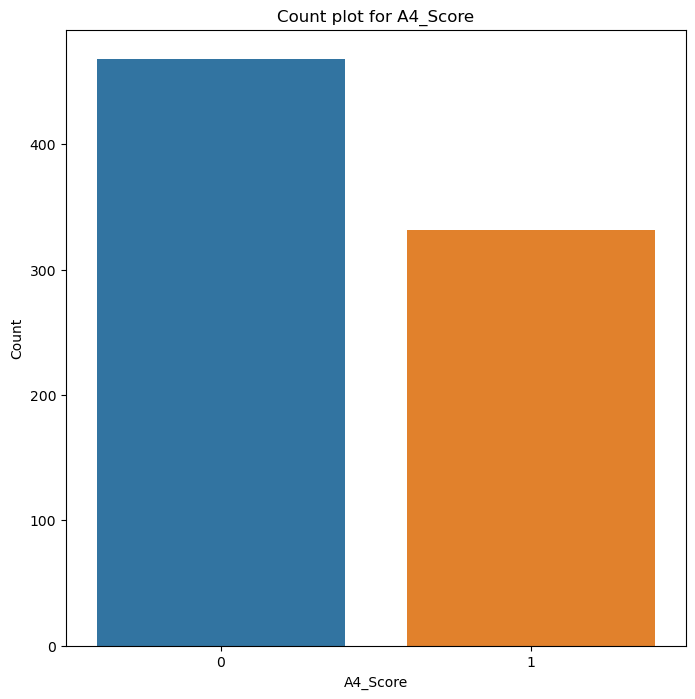

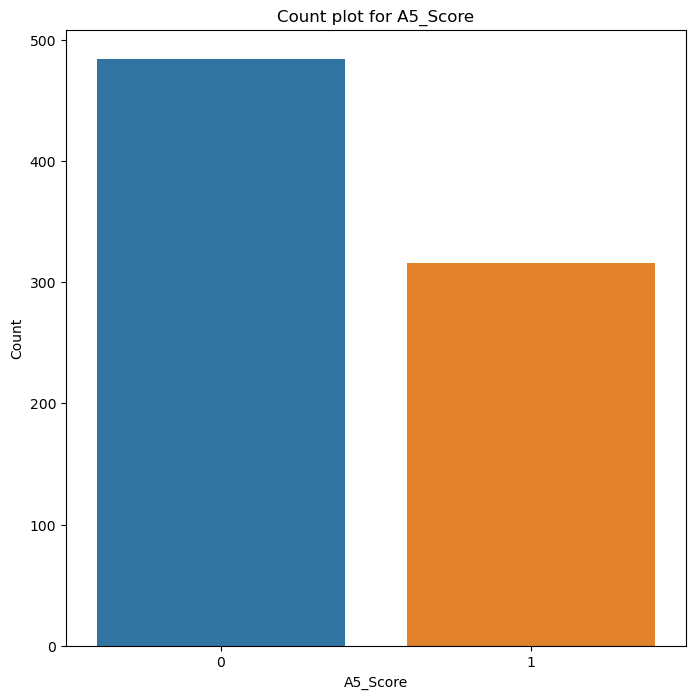

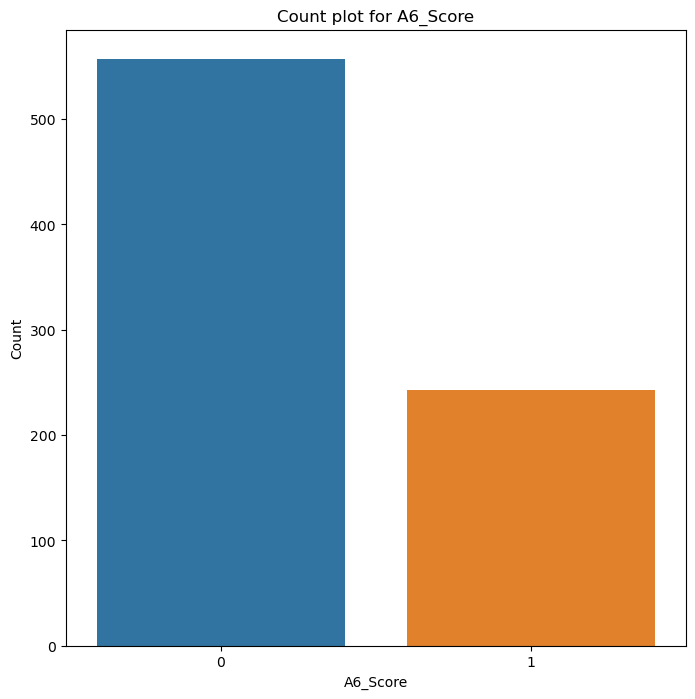

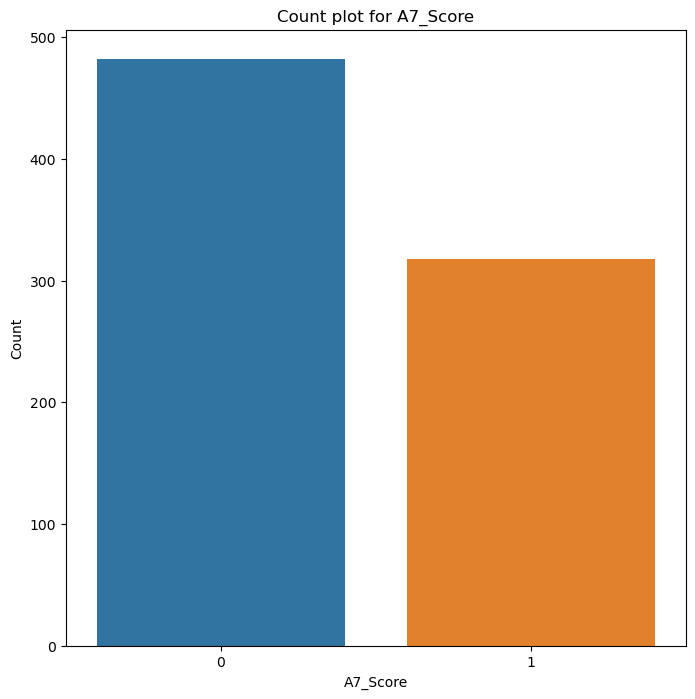

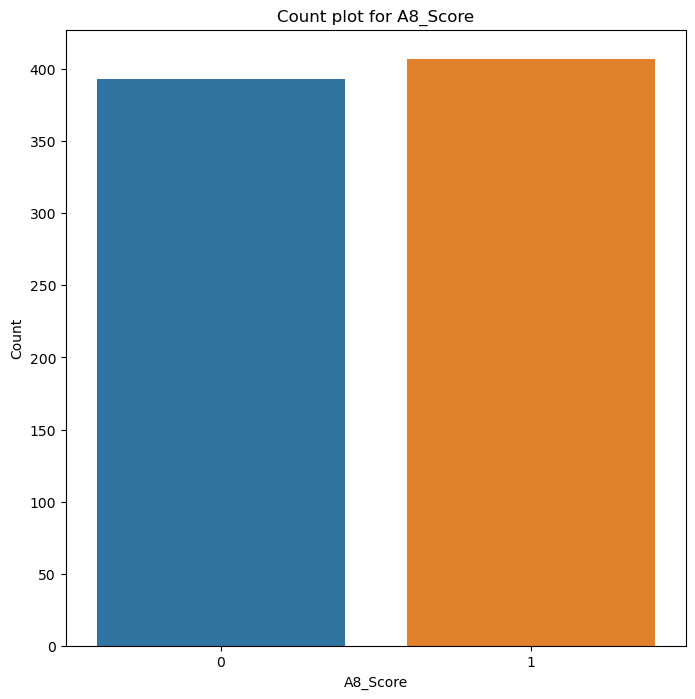

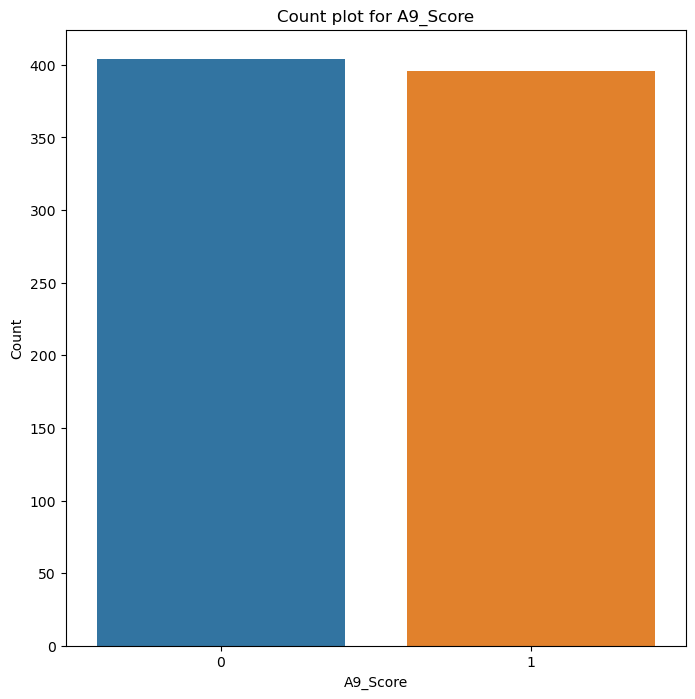

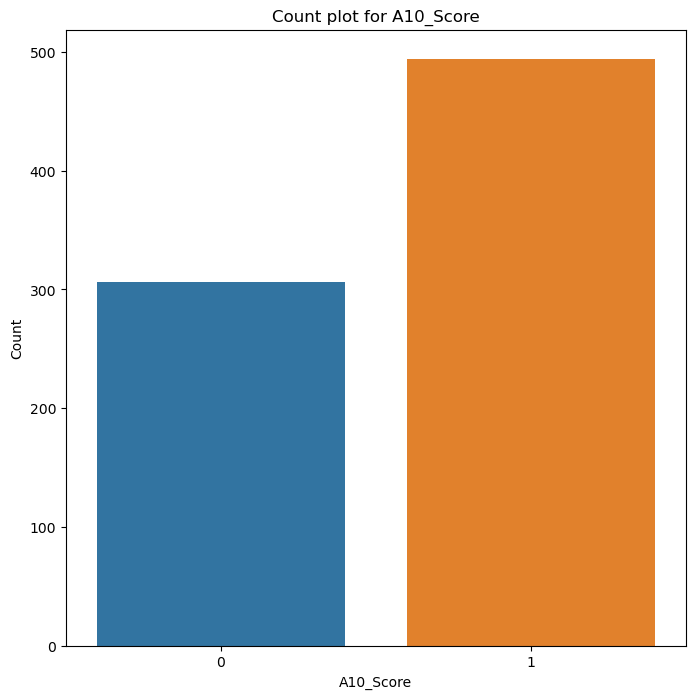

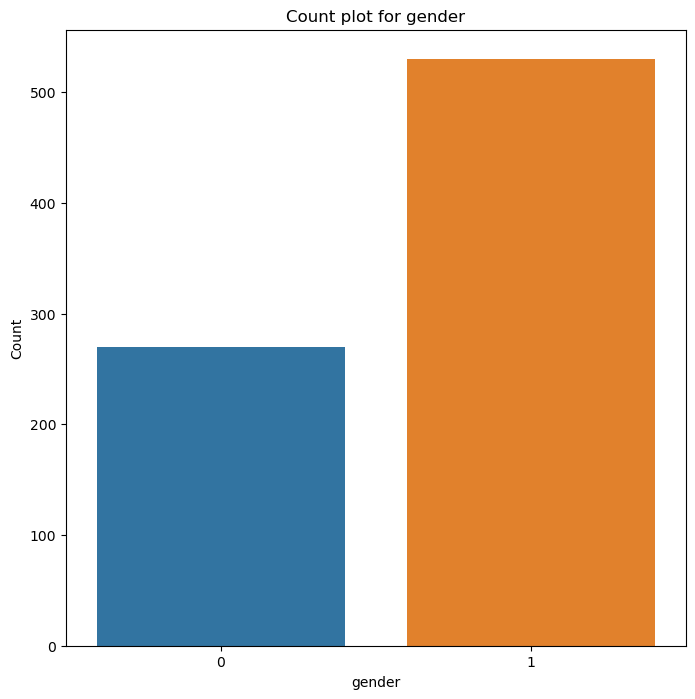

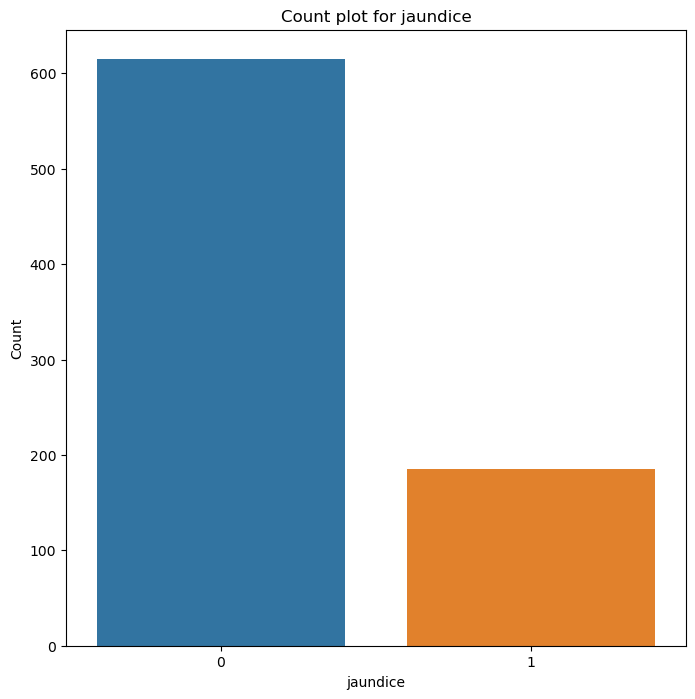

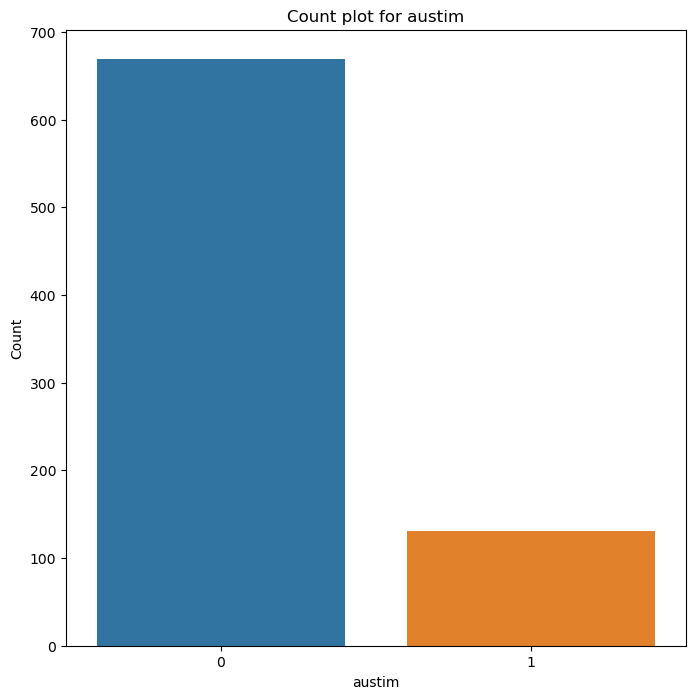

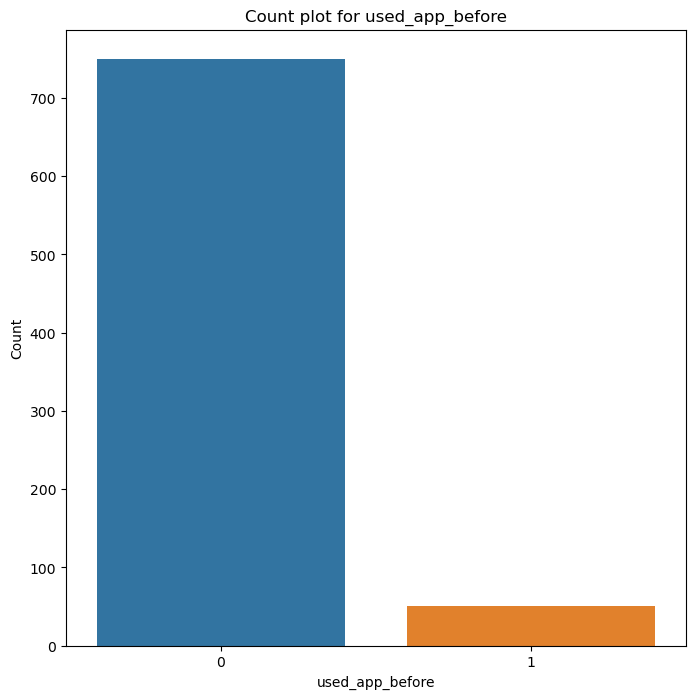

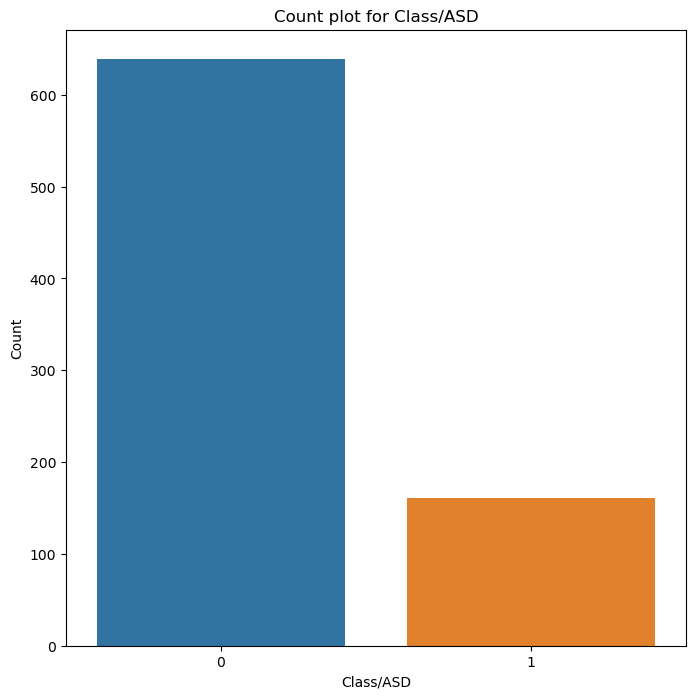

In [77]:
numeric_columns=data.select_dtypes(include=['float64','int64']).drop(columns=['ID','result','age'])
for column in numeric_columns.columns:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"Count plot for {column}")  
    sns.countplot(x=data[column])  
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


Mean: 27.96375
Median: 24.0


C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


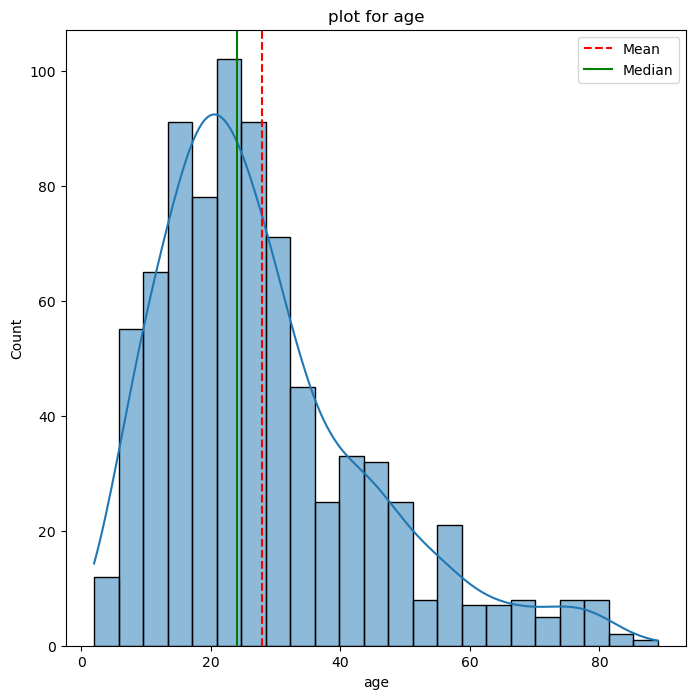

C:\Users\Mohammad\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean: 8.537303106501248
Median: 9.605299308


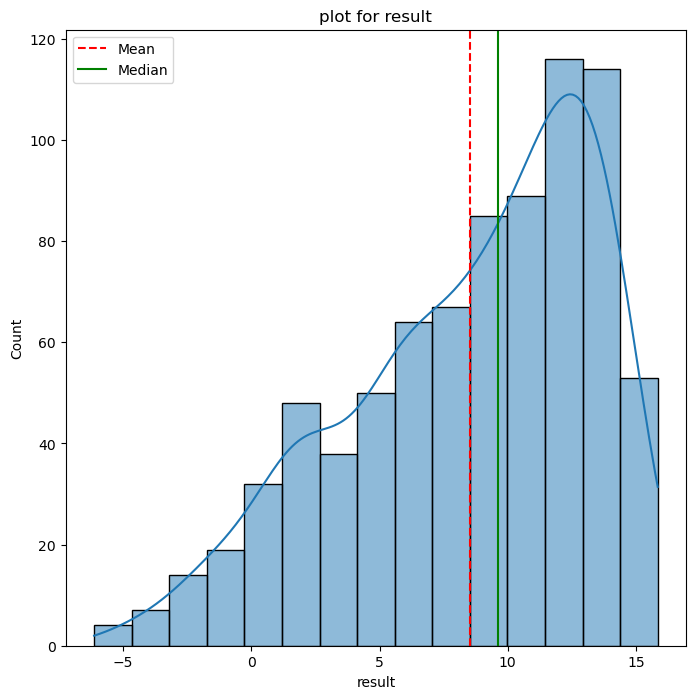

In [78]:

continous_columns=['age','result']
for column in continous_columns:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.histplot(x=data[column],kde=True)  
    mean = data[column].mean()
    median = data[column].median()

    print("Mean:", mean)
    print("Median:", median)



    plt.axvline(mean, color="red", linestyle="--", label="Mean")
    plt.axvline(median, color="green", linestyle="-", label="Median")

    plt.legend()

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


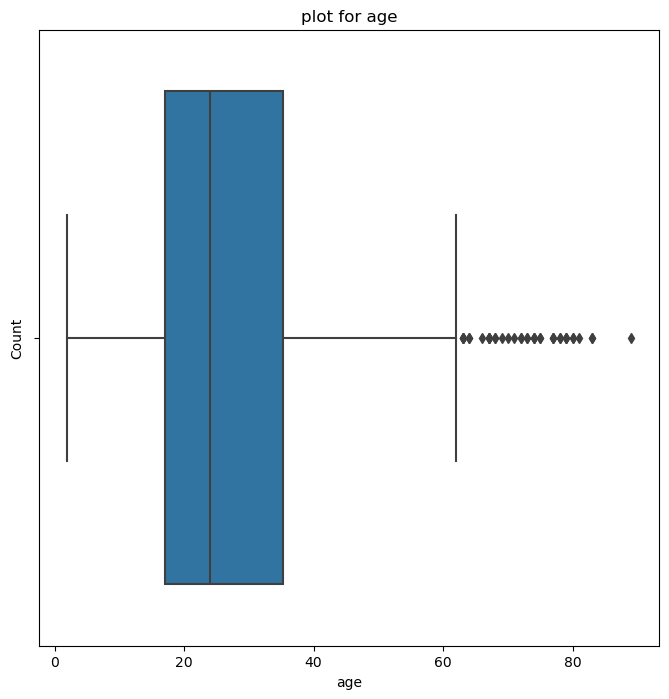

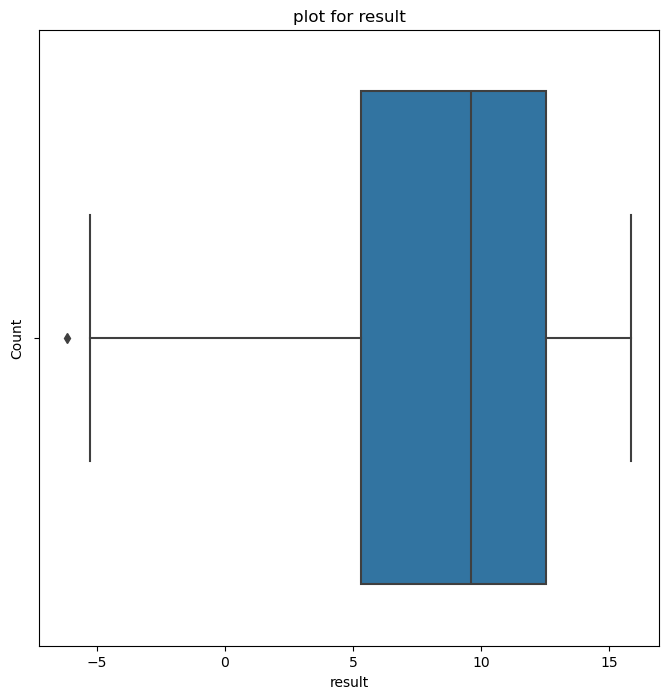

In [79]:
for column in continous_columns:  
    plt.figure(figsize=(8, 8))  
    plt.title(f"plot for {column}")  
    sns.boxplot(x=data[column])  
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()



In [80]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    data_without_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_without_outliers


In [81]:
remove_outliers(data,'age')

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,0,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,1,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,1,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,0,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,1,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,1,Hispanic,0,0,New Zealand,0,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,1,White-European,0,0,Cyprus,0,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,1,South Asian,1,0,New Zealand,0,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,0,Others,0,0,Canada,0,9.069342,18 and more,Self,0


In [82]:
remove_outliers(data,'result')

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,0,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,1,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,1,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,0,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,1,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,1,Hispanic,0,0,New Zealand,0,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,1,White-European,0,0,Cyprus,0,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,1,South Asian,1,0,New Zealand,0,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,0,Others,0,0,Canada,0,9.069342,18 and more,Self,0


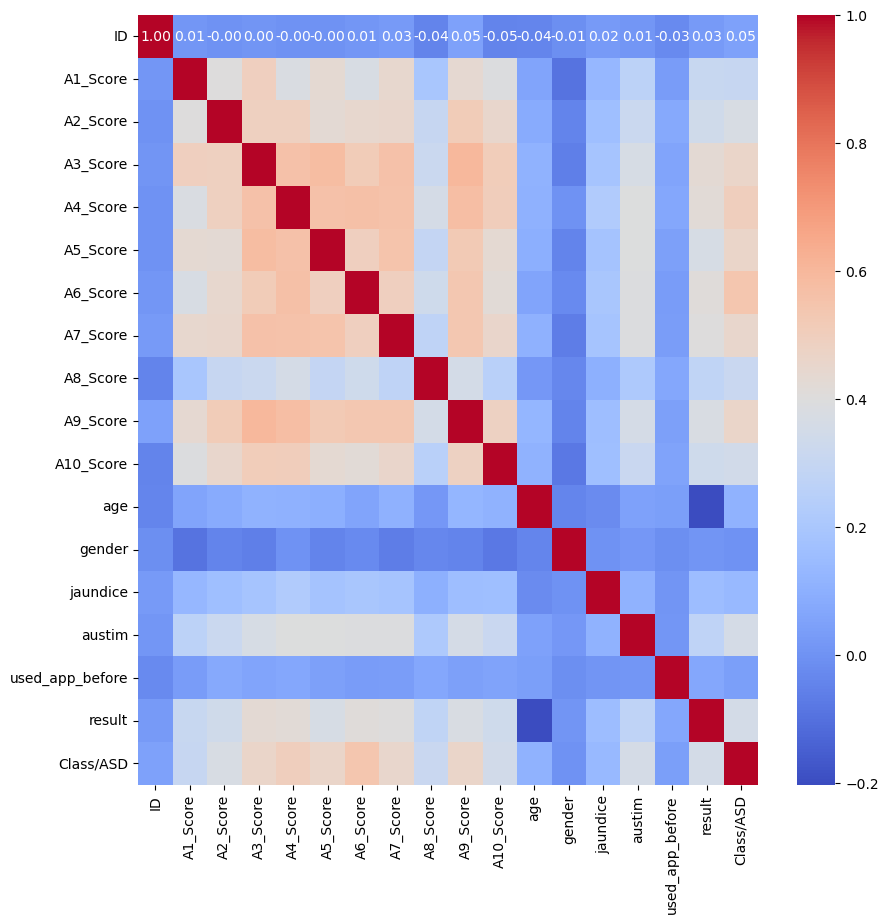

In [83]:

plt.figure(figsize=(10, 10))  
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [84]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_data = data.select_dtypes(include=['float64', 'int64'])

X = add_constant(numeric_data)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


            Feature        VIF
0             const  16.273508
1                ID   1.020099
2          A1_Score   1.495525
3          A2_Score   1.637864
4          A3_Score   2.222418
5          A4_Score   2.202088
6          A5_Score   1.942315
7          A6_Score   1.944999
8          A7_Score   1.958556
9          A8_Score   1.248213
10         A9_Score   2.112809
11        A10_Score   1.638261
12              age   1.147570
13           gender   1.022340
14         jaundice   1.071317
15           austim   1.336117
16  used_app_before   1.015044
17           result   1.541981
18        Class/ASD   1.676807


In [85]:
target=data['Class/ASD']
target.value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [86]:
numeric_features=[
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'jaundice',
 'austim',
 'used_app_before',
    'result'
 
 ]
category_features=['ethnicity','contry_of_res','relation']


In [87]:
X=data[numeric_features+category_features]
Y=target

In [88]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, random_state=42)



In [89]:

numeric_transform=Pipeline(steps=[
    ('scale',StandardScaler()),
    
]) 
cat_transformn=Pipeline(steps=[
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])

column_transform=ColumnTransformer([
    ('1',numeric_transform,numeric_features),
    ('2',cat_transformn,category_features)
],remainder='passthrough')

data_processing=Pipeline(steps=[
                         ('process',column_transform)
])

x_train_p=data_processing.fit_transform(x_train)
x_test_p=data_processing.transform(x_test)


counter=Counter(y_train)

smote=SMOTE(k_neighbors=5,sampling_strategy={1:(max(counter.values()))+200})
x_train_smote,y_train_smote=smote.fit_resample(x_train_p,y_train)

In [90]:
y_train_smote.value_counts()

Class/ASD
1    715
0    515
Name: count, dtype: int64

In [91]:
random_forest = RandomForestClassifier(n_estimators=50,random_state=42,max_depth=20)
random_forest.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

In [92]:
y_test_pred = random_forest.predict(x_test_p)

print("accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

accuracy score:
 0.84375
Confusion Matrix:
 [[112  12]
 [ 13  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       124
           1       0.66      0.64      0.65        36

    accuracy                           0.84       160
   macro avg       0.78      0.77      0.77       160
weighted avg       0.84      0.84      0.84       160

